In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    

In [2]:
#Using the pd.read_csv() function to read in a CSV file named "Amazon Sales data.csv" 
df=pd.read_csv("Amazon Sales data.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
# Display total values of all country 
df["Country"].value_counts()

The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: Country, Length: 76, dtype: int64

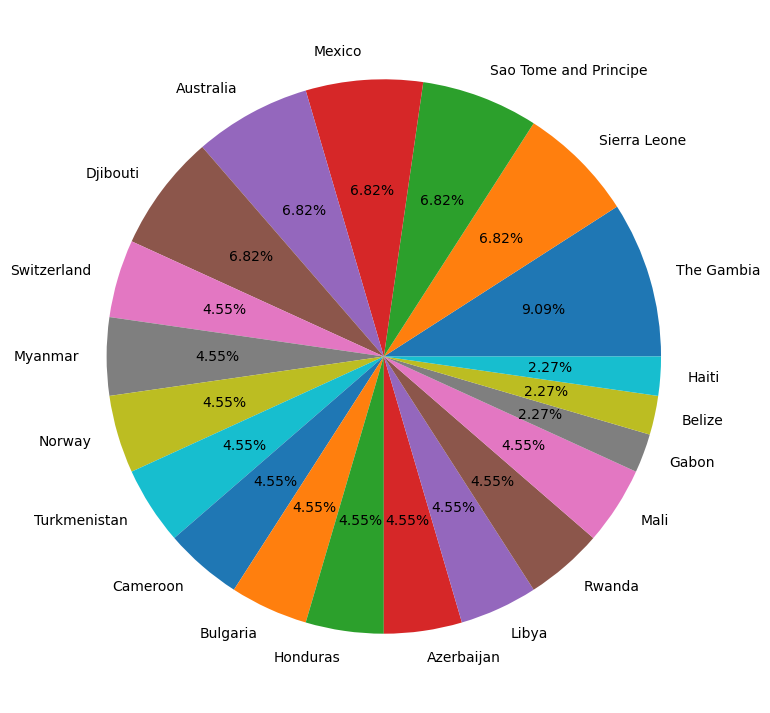

In [7]:
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

# Exploratory Data Analysis

C:\Users\shock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


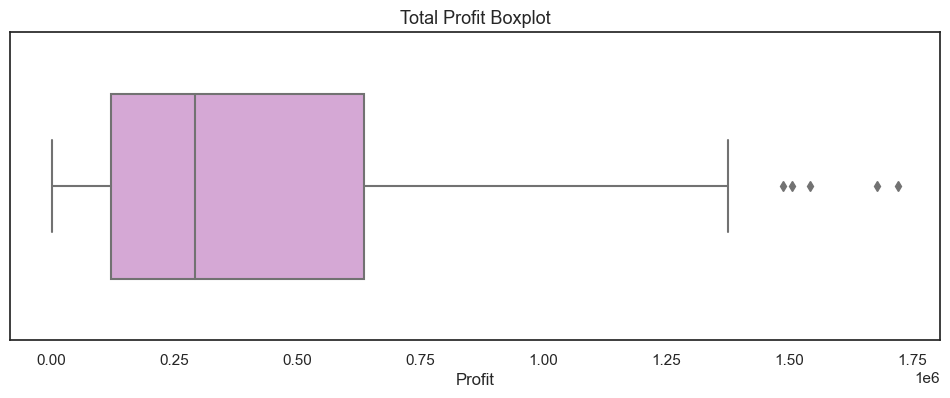

In [8]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(df['Total Profit'], color="plum", width=.6)
plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

Creating the function to detect outliers using z_score method. The Z-score method assumes that the data
follows a normal distribution and detects outliers as values that fall outside a certain number of standard
deviations from the mean. In this case, the threshold is set to 2 standard deviations. The function first
calculates the mean and standard deviation of the column. It then loops through each value in the column
and calculates its Z-score. If the absolute Z-score is greater than the threshold, the function appends the
index of the outlier to a list and prints the corresponding row of the DataFrame. Finally, the function returns
the list of outlier indices.

In [9]:
def detect_outliers(df, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(df.loc[i])
    return outliers

In [10]:
outliers = detect_outliers(df, df["Total Profit"])

Region            Central America and the Caribbean
Country                                    Honduras
Item Type                                 Household
Sales Channel                               Offline
Order Priority                                    H
Order Date                                 2/8/2017
Order ID                                  522840487
Ship Date                                 2/13/2017
Units Sold                                     8974
Unit Price                                   668.27
Unit Cost                                    502.54
Total Revenue                            5997054.98
Total Cost                               4509793.96
Total Profit                             1487261.02
Name: 13, dtype: object
Region                 Europe
Country           Switzerland
Item Type           Cosmetics
Sales Channel         Offline
Order Priority              M
Order Date          9/17/2012
Order ID            249693334
Ship Date          10/20/2012
Units So

In [11]:
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


C:\Users\shock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


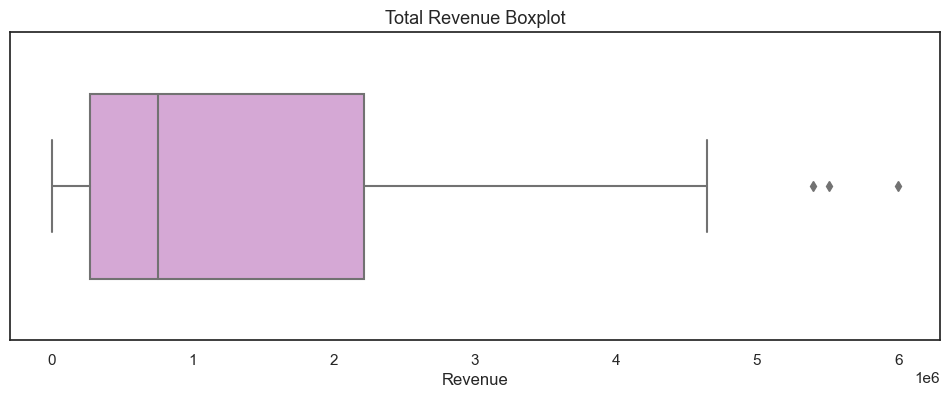

In [17]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(df['Total Revenue'], color="plum", width=.6)
plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

C:\Users\shock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


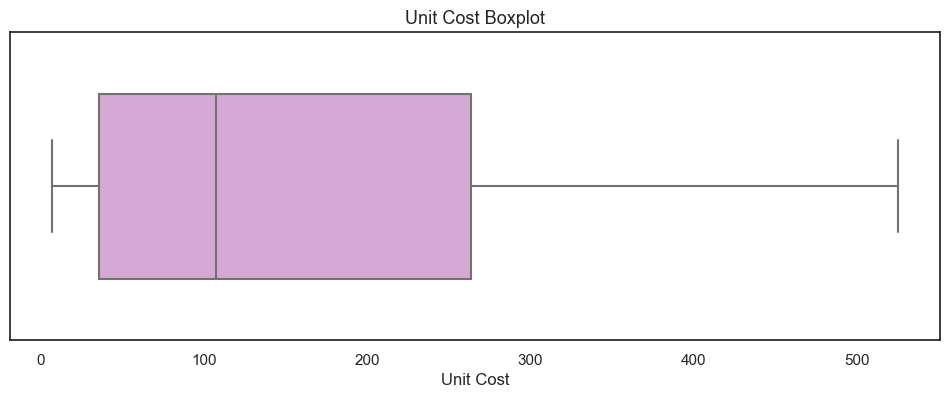

In [18]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(df['Unit Cost'], color="plum", width=.6)
plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

C:\Users\shock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


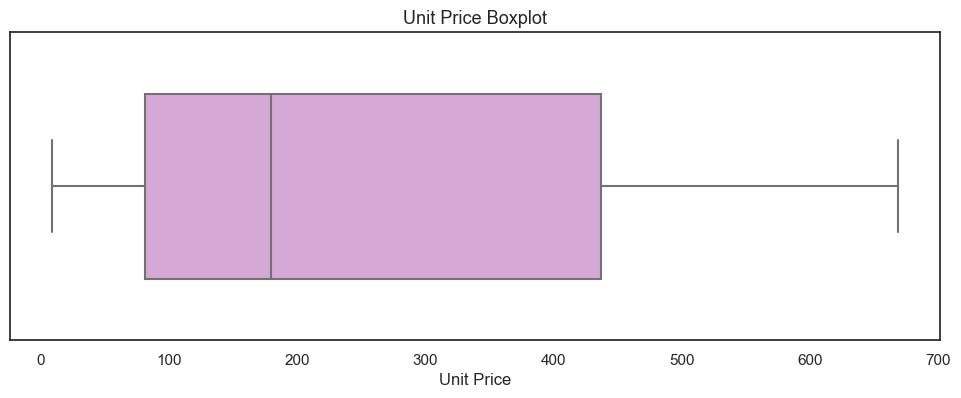

In [19]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(df['Unit Price'], color="plum", width=.6)
plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()

In [20]:
corr= df.corr()

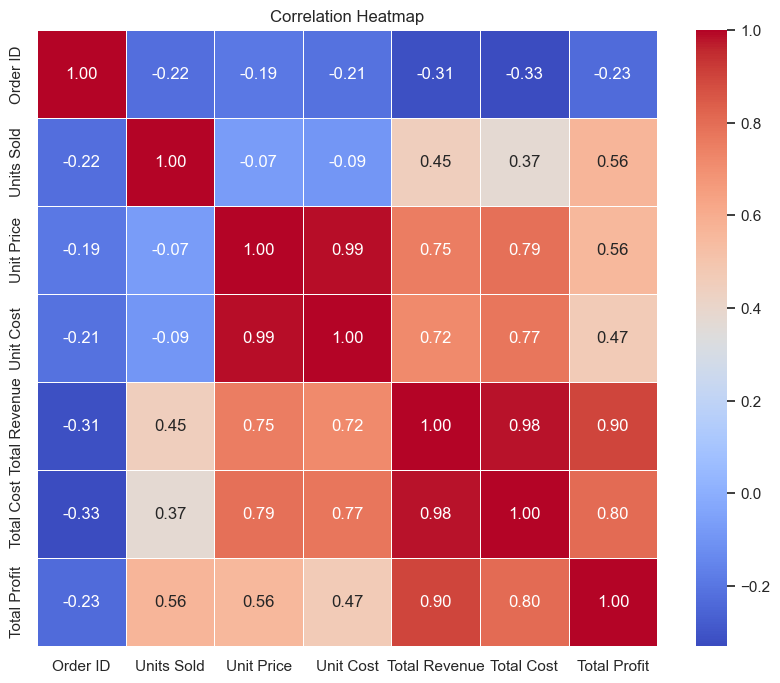

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()